In [12]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 15,6

In [13]:
'''generate synthetic data'''
periods = 7 * 24 * 60 # 7 days of data at 1 minute frequency
t_idx = pd.date_range(start=datetime.datetime.today().date(), periods=periods, freq='T')

np.random.seed(42)
data = np.random.randn(periods)

df = pd.DataFrame(data, index=t_idx, columns=['synthetic_data'])

In [14]:
'''add outliers'''
outlier_count = 50
np.random.seed(42)
outlier_loc = np.random.choice(np.arange(df.shape[0]), size=outlier_count)
df.iloc[outlier_loc] = np.random.choice(np.arange(10,50), size=outlier_count).reshape(-1,1)

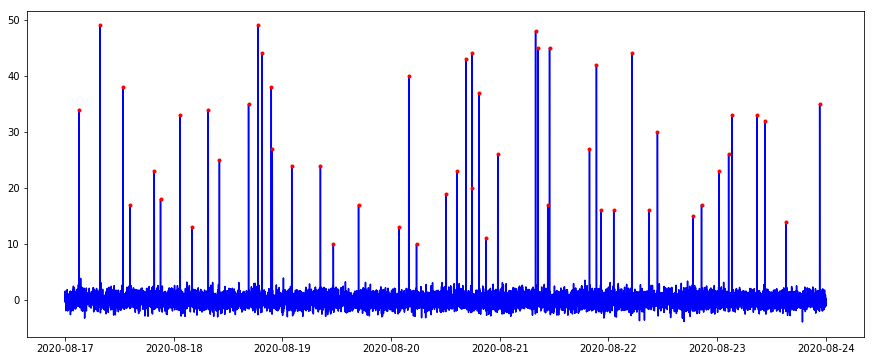

In [15]:
'''plot'''
plt.plot(df.synthetic_data, 'b-', df.synthetic_data[outlier_loc], 'r.')
plt.show()

In [16]:
'''Savitzky-Golay filter:
S-G filter preserves the underlying nature of signal by convoluting 
points in the given window. 
noise level :: raw-data > S-G filter > Moving average 
'''
from scipy.signal import savgol_filter

In [17]:
df['filtered'] = savgol_filter(df.synthetic_data, window_length=60+1, polyorder=5)

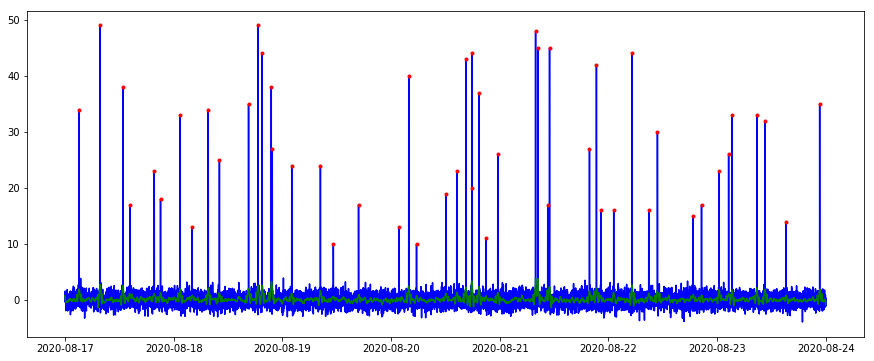

In [18]:

plt.plot(df.synthetic_data, 'b-',
         df.synthetic_data[outlier_loc], 'r.',
         df.filtered, 'g')


In [19]:
from sklearn.ensemble import IsolationForest

In [20]:
iforest = IsolationForest(random_state=0).fit(df.synthetic_data.values.reshape(-1,1))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


In [21]:
df['outlier'] = iforest.predict(df.synthetic_data.values.reshape(-1,1))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


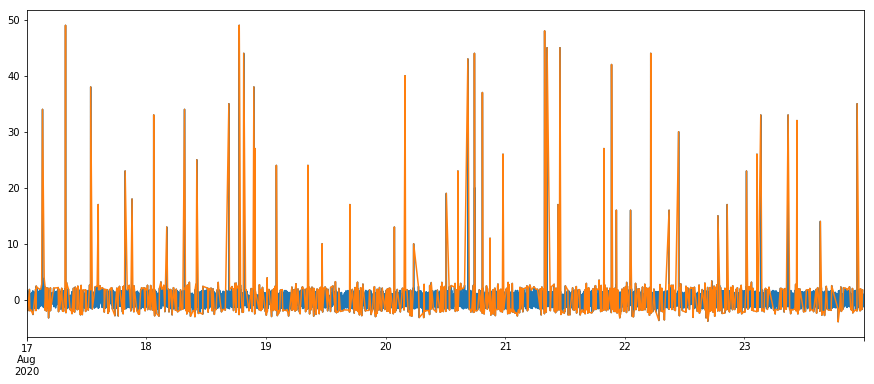

In [22]:
df.synthetic_data.plot()
df.synthetic_data[df.outlier==-1].plot()